In [1]:
# The example for crawling reviews from YaHoo movies

import requests
from bs4 import BeautifulSoup as bs 
from datetime import datetime

movie_id = str(input("Enter movie ID"))
pages = 0

commentList = []

res = requests.get('https://tw.movies.yahoo.com/movieinfo_review.html/id={}&s=0&o=0&p={}'.format(movie_id,pages))
soup = bs(res.text,'html.parser')

for page in soup.select('.statistic') :
    global final_page 
    lastPages = page.text.replace('共','').split('筆，')[0]
    final_page = int(round(float(lastPages)/10,0))
    #print (final_page)

def getCommentInfo(data):
    
     # Star
        src=data.find('img')['src']
        src = src.replace('https://s.yimg.com/f/i/tw/movie/i6/rating_star_','').replace('.gif','')
        #print(src.strip())
    
        # Date
        date = data.select('div.date')[0]
        dateDelete = date.text.split('發表時間：')[1]
        #print (dateDelete)
        # Author
        author = date.text.strip().split('發表時間：')[0]
        authorDelete = author.split('發表人：')[1]
        #print (authorDelete)

        content = data.select('div.text')[0]
        title = content.select('h4')
        comment = content.select('p')
        # Title
        if len(title) > 0 and '標題：' in str(title) :
            titleDelete = title[0].text.replace('Title: ','')
            titleDelete = titleDelete.split('標題：')[1]
            #print (titleDelete)
        # Comment
        if len(comment) > 0  and '上映日期：' not in str(comment) :
            #print (comment[0].text,'\n')
            

            date_object = datetime.strptime(dateDelete, '%Y-%M-%d').isoformat()
            commentList.append({'Star': int(src.strip()), 'Date':date_object[0:10], 'Author':authorDelete, 'Title':titleDelete, 'Comment':comment[0].text})

    

for change_page in range(pages,final_page+1) :
    
    print ('---now is up to page',change_page+1,'---')
    
    res = requests.get('https://tw.movies.yahoo.com/movieinfo_review.html/id={}&s=0&o=0&p={}'.format(movie_id,change_page))
    soup = bs(res.text,'html.parser')


    # 1  to 9        
    for data in soup.select('div.row') : 
        getCommentInfo(data)
       
    # 10
    for data in soup.select('div.row_last') :  
        getCommentInfo(data)
    




Enter movie ID6233
---now is up to page 1 ---
---now is up to page 2 ---
---now is up to page 3 ---
---now is up to page 4 ---
---now is up to page 5 ---
---now is up to page 6 ---
---now is up to page 7 ---
---now is up to page 8 ---
---now is up to page 9 ---
---now is up to page 10 ---
---now is up to page 11 ---
---now is up to page 12 ---
---now is up to page 13 ---
---now is up to page 14 ---
---now is up to page 15 ---
---now is up to page 16 ---
---now is up to page 17 ---
---now is up to page 18 ---
---now is up to page 19 ---
---now is up to page 20 ---
---now is up to page 21 ---
---now is up to page 22 ---
---now is up to page 23 ---
---now is up to page 24 ---
---now is up to page 25 ---
---now is up to page 26 ---
---now is up to page 27 ---
---now is up to page 28 ---
---now is up to page 29 ---
---now is up to page 30 ---
---now is up to page 31 ---
---now is up to page 32 ---
---now is up to page 33 ---
---now is up to page 34 ---
---now is up to page 35 ---
---now is 

In [6]:
# There is a easy way(import pandas) to show the information crawled from web content

import pandas as pd
# list has to be declared to data frame of pandas
df = pd.DataFrame(commentList)
# Show some rows, and will find the dirty sentences (row 5 and 8)
df[75:85]

#http://pandas.pydata.org/pandas-docs/version/0.15.2/tutorials.html

,Author,Comment,Date,Star,Title
75,Hiddenman,覺得好看耶，有些鏡頭真的滿震撼的,2016-01-30,5,覺得好看耶，有些鏡頭真的滿震撼的
76,evohsieh666,最後還蠻好笑的...lol,2016-01-30,2,看到打瞌睡
77,阿童,只有爛而已⋯⋯比第一集爛太多.想不跟第一集比較.卻也是大爛片.置入行銷不說.劇情潦草.演員演...,2016-01-30,1,只有爛而已⋯⋯比第一集爛太多.想不跟第一集比較.卻也是大爛片.置入行銷不說.劇情潦草.演員演...
78,allenlai830,浪費生命2小時還有250塊.沒劇情特效超爛..硬湊出來的電影是給誰交代用啊~\n有沒有負評的...,2016-01-30,1,浪費生命
79,chunlungchen@kimo.com,看完後肯定要給五顆心~~不要管邏輯不邏輯的~~電影如果都要符合正常邏輯~~那麼就請想看電影的...,2016-01-30,5,20年前~這定義不重要~~
80,5678,2個小時的廣告片,2016-01-30,1,2個小時的廣告片
81,chanel_cute0706,這系列好像出了很多部電影\n但我卻是第一次看\n簡單來說\n有些地方好笑\n有些地方特效不錯...,2016-01-30,3,第一次看
82,monlily2002,"個人覺得是爽片,特效+2, Angelababy +1, 劇情故事緊湊沒有泠場 +1,可以進戲院看",2016-01-30,4,"個人覺得是爽片,故事緊湊沒有泠場"
83,bryent0818,憑良心講\n說是無腦爽片都有點恭維了 = =,2016-01-29,1,憑良心講
84,box_502,我有6/22晚上威尼斯票根 \n跟我聯絡 用FB找 box_502@yahoo.com.tw,2016-01-29,5,我有票根


In [27]:
# Clear dirty data  \n
#lambda is a easy way to express function

# EX:
#func2 = lambda x,y,z : x+y+z
#>>>  func2(1, 2, 3)
#>>>  6

df['Comment'] =df['Comment'].map(lambda x: ''.join(x.split()))
df['Title'] =df['Title'].map(lambda x: ''.join(x.split()))
df['Date'] =df['Date'].map(lambda x: ''.join(x.split('2016-')))
df[75:85]

,Author,Comment,Date,Star,Title
75,Hiddenman,覺得好看耶，有些鏡頭真的滿震撼的,01-30,5,覺得好看耶，有些鏡頭真的滿震撼的
76,evohsieh666,最後還蠻好笑的...lol,01-30,2,看到打瞌睡
77,阿童,只有爛而已⋯⋯比第一集爛太多.想不跟第一集比較.卻也是大爛片.置入行銷不說.劇情潦草.演員演...,01-30,1,只有爛而已⋯⋯比第一集爛太多.想不跟第一集比較.卻也是大爛片.置入行銷不說.劇情潦草.演員演...
78,allenlai830,浪費生命2小時還有250塊.沒劇情特效超爛..硬湊出來的電影是給誰交代用啊~有沒有負評的星星~~,01-30,1,浪費生命
79,chunlungchen@kimo.com,看完後肯定要給五顆心~~不要管邏輯不邏輯的~~電影如果都要符合正常邏輯~~那麼就請想看電影的...,01-30,5,20年前~這定義不重要~~
80,5678,2個小時的廣告片,01-30,1,2個小時的廣告片
81,chanel_cute0706,這系列好像出了很多部電影但我卻是第一次看簡單來說有些地方好笑有些地方特效不錯我還以為以前沒看...,01-30,3,第一次看
82,monlily2002,"個人覺得是爽片,特效+2,Angelababy+1,劇情故事緊湊沒有泠場+1,可以進戲院看",01-30,4,"個人覺得是爽片,故事緊湊沒有泠場"
83,bryent0818,憑良心講說是無腦爽片都有點恭維了==,01-29,1,憑良心講
84,box_502,我有6/22晚上威尼斯票根跟我聯絡用FB找box_502@yahoo.com.tw,01-29,5,我有票根


In [28]:
# Choose and sort DataFrame 
starPlot =  df.ix[0:, ['Date','Star']]
starPlot = starPlot.sort(['Date','Star'], ascending=[1, 0])
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort.html
starPlot[0:20]

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Date,Star
64,01-01,5
69,01-01,5
62,01-01,4
71,01-01,3
72,01-01,3
66,01-01,2
63,01-01,1
65,01-01,1
67,01-01,1
68,01-01,1


In [29]:
# Average star with Date
grouped = df.groupby(['Date'], as_index=False).mean()
#https://www.youtube.com/watch?v=p8hle-ni-DM
print (grouped)

     Date      Star
0   01-01  2.454545
1   01-02  3.000000
2   01-03  2.818182
3   01-04  3.500000
4   01-05  4.000000
5   01-06  5.000000
6   01-07  2.250000
7   01-08  3.000000
8   01-09  1.000000
9   01-10  2.666667
10  01-11  1.300000
11  01-12  3.000000
12  01-13  2.000000
13  01-16  3.000000
14  01-17  3.000000
15  01-22  2.775510
16  01-23  2.600000
17  01-24  3.239130
18  01-25  2.720930
19  01-26  3.369565
20  01-27  3.137931
21  01-28  3.263158
22  01-29  2.866667
23  01-30  2.700000


Populating the interactive namespace from numpy and matplotlib


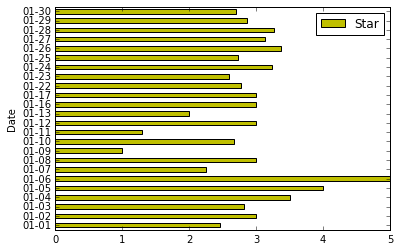

In [32]:
# using plot

%pylab inline   

starPlot = grouped.set_index(['Date'])

ax = starPlot.plot(color='y',kind='barh') #http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

In [33]:
#store the fig
fig = ax.get_figure()

fig.savefig('D://outputResult.jpg')